# Data Analysis and Visualization : Shristi Maskay

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import googletrans 
from googletrans import Translator
import matplotlib.dates as mdates
from datetime import datetime
import calendar
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Load

In [2]:
df = pd.read_csv('Price.csv')
df.head()

,कृषि उपज,ईकाइ,न्यूनतम,अधिकतम,औसत,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,02/25/2018,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,02/25/2018,W
2,अालु रातो,के.जी.,२०,२३,२२,02/25/2018,W
3,अालु सेतो,के.जी.,१८,२०,१९,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,02/25/2018,W


# Data Cleaning

###### Rename Column to readable form

In [3]:
df.columns = ['Vegetable', 'Unit', 'low_price', 'high_price', "average", "Date", "priceType"]
df.head()

,Vegetable,Unit,low_price,high_price,average,Date,priceType
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,02/25/2018,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,02/25/2018,W
2,अालु रातो,के.जी.,२०,२३,२२,02/25/2018,W
3,अालु सेतो,के.जी.,१८,२०,१९,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,02/25/2018,W


###### Translate price to integer format

In [4]:
def convert(val):
    result = []
    for v in val:
        result.append(int(v))
    return result

df['low_price'] = convert(df['low_price'].tolist())
df['high_price'] = convert(df['high_price'].tolist())
df['average'] = convert(df['average'].tolist())

df.head()

,Vegetable,Unit,low_price,high_price,average,Date,priceType
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,02/25/2018,W
1,गोलभेडा सानो,के.जी.,25,30,28,02/25/2018,W
2,अालु रातो,के.जी.,20,23,22,02/25/2018,W
3,अालु सेतो,के.जी.,18,20,19,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,02/25/2018,W


In [5]:
df['Unit'] = df['Unit'].str.replace('के.जी.', 'kg')
df['Unit'] = df['Unit'].str.replace('के जी', 'kg')
df['Unit'] = df['Unit'].str.replace('केजी', 'kg')
df['Unit'] = df['Unit'].str.replace('प्रति गोटा', 'psc')
df['Unit'] = df['Unit'].str.replace('दर्जन', 'doz')
df_new = df

df['Unit'].value_counts()

kg     96430
psc     1436
doz     1436
Name: Unit, dtype: int64

###### use pandas datetime to convert Date to datetime format

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Vegetable             object
Unit                  object
low_price              int64
high_price             int64
average                int64
Date          datetime64[ns]
priceType             object
dtype: object


In [7]:
df.head()
vegetable = set(df['Vegetable'].values)
len(vegetable)


120

# Data Analysis and Visualization

###### Get Month from date 

In [8]:
df['year']=''
def getMonth(val):
    result = []
    for v in val:
        result.append(v.month)
    return result

df['month'] = getMonth(df['Date'].tolist())
df['year'] = pd.DatetimeIndex(df['Date']).year

df.head()

,Vegetable,Unit,low_price,high_price,average,Date,priceType,year,month
0,गोलभेडा ठूलो(नेपाली),kg,30,35,33,2018-02-25,W,2018,2
1,गोलभेडा सानो,kg,25,30,28,2018-02-25,W,2018,2
2,अालु रातो,kg,20,23,22,2018-02-25,W,2018,2
3,अालु सेतो,kg,18,20,19,2018-02-25,W,2018,2
4,प्याज सुकेको भारतीय,kg,44,46,45,2018-02-25,W,2018,2


In [9]:
# List of vegetables
Key_vegetables = df.groupby(['Vegetable']).groups.keys()
Key_vegetables

dict_keys(['अंगुर(कालो)', 'अंगुर(हरियो)', 'अदुवा', 'अनार', 'अम्बा', 'अाँप(दसहरी)', 'अालु रातो', 'अालु सेतो', 'आँप(मालदह)', 'आलु रातो(भारतीय)', 'आलु रातो(मुडे)', 'इमली', 'काउली तरार्इ', 'काउली स्थानिय', 'काक्रो(लोकल)', 'काक्रो(हाइब्रीड)', 'कागती', 'कुरीलो', 'केरा', 'कोइरालो', 'खुर्सानी हरियो(अकबरे)', 'खुर्सानी हरियो(बुलेट)', 'खुर्सानी हरियो(माछे)', 'खु्र्सानी सुकेको', 'खु्र्सानी हरियो', 'गाजर(तराई)', 'गाजर(लोकल)', 'गान्टे मूला', 'गुन्दुक', 'गोलभेडा ठूलो(नेपाली)', 'गोलभेडा सानो', 'गोलभेडा सानो(टनेल)', 'गोलभेडा सानो(तराई)', 'गोलभेडा सानो(भारतीय)', 'ग्याठ कोबी', 'घिउ सिमी(राजमा)', 'घिउ सिमी(लोकल)', 'घिउ सिमी(हाइब्रीड)', 'घिरौला', 'चमसूरको साग', 'चिचिण्डो', 'चुकुन्दर', 'च्याउ(कन्य)', 'च्याउ(डल्ले)', 'छ्यापी सुकेको', 'छ्यापी हरियो', 'जिरीको साग', 'झिगूनी', 'टाटे सिमी', 'ठूलो गोलभेडा(भारतीय)', 'तरबुजा(पाटे)', 'तरबुजा(हरियो)', 'तरुल', 'ताजा माछा(छडी)', 'ताजा माछा(बचुवा)', 'ताजा माछा(म\u200cंुगरी)', 'ताजा माछा(रहु)', 'तामा', 'तितो करेला', 'तोफु', 'तोरीको साग', 'नासपाती(चाइनिज)', 'नासपाती(लोकल)'

In [10]:
df.describe()

,low_price,high_price,average,year,month
count,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000
mean,102.130984,111.899368,107.094751,2018.681346,6.584943
std,79.376194,82.277694,80.746183,0.608148,3.487649
min,1.000000,10.000000,9.000000,2018.000000,1.000000
25%,50.000000,60.000000,55.000000,2018.000000,4.000000
50%,80.000000,90.000000,85.000000,2019.000000,7.000000
75%,130.000000,140.000000,135.000000,2019.000000,10.000000
max,1600.000000,1650.000000,1625.000000,2020.000000,12.000000


In [11]:
vege = df['Vegetable'].value_counts()
vege

केरा                1436
मूला सेतो(लोकल)     1436
भुर्इ कटहर          1436
खु्र्सानी सुकेको    1436
काउली स्थानिय       1436
                    ... 
अम्बा                 44
सजिवन                 32
अंगुर(कालो)           32
लीच्ची(भारतीय)        28
परवर(तराई)            16
Name: Vegetable, Length: 120, dtype: int64

In [12]:
df['Unit'].value_counts()

kg     96430
psc     1436
doz     1436
Name: Unit, dtype: int64

##### Comparison to see the price of vegetable in 2018, 2019 an 2020 grouped by month for moxium pri ce per month

In [18]:
# Which month  vegetable price is max and min
veg_grp_month = df.groupby(by=['month'], as_index=False)[['Vegetable','average']].mean()
veg_grp_month.sort_values(by='month', ascending=True)
veg_grp_month

,month,average
0,1,105.999573
1,2,95.265785
2,3,90.068067
3,4,98.449060
4,5,99.375374
5,6,105.817012
6,7,114.422013
7,8,118.540048
8,9,117.756936
9,10,122.420048


###### The above table showed the Maxium price of vegetable was during July, Aug and September, 

<Figure size 1440x432 with 0 Axes>

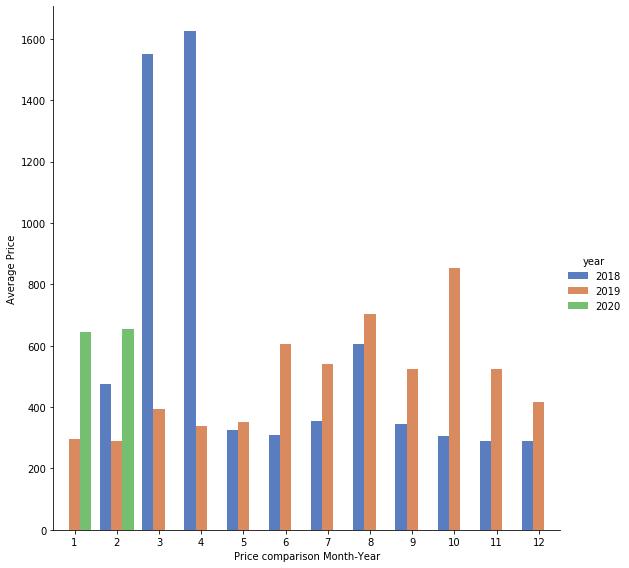

In [14]:
veg_price_month_year = df.groupby(by=['month','year'], as_index=False)[['Vegetable','average']].max()
veg_price_month_year
fig = plt.figure(figsize = (20,6))

ax = sns.catplot(x="month", y="average", hue="year", data=veg_price_month_year,
                height=8,kind="bar", palette="muted")

ax.set_ylabels("Average Price")
ax.set_xlabels("Price comparison Month-Year")


###### Above Diagram max vegetable price: 
    for 2018: showed maxium price during April that was above 1600 followed by March between 1500-1600 and 
        vegetable price droped during july and october, november december
    for 2019: showed that peak price for vegetables was during october about RS. 900 and 
        minium priced was during Jan and Feb
    for 2020: we had only 2 months data but the price for Jan and Feb are higher than previous year.
It is quite difficult to predict the priced for upcoming month through this plot

##### Comparison to see the price of vegetable in 2018, 2019 an 2020 grouped by month for mean price pre month

<Figure size 1440x432 with 0 Axes>

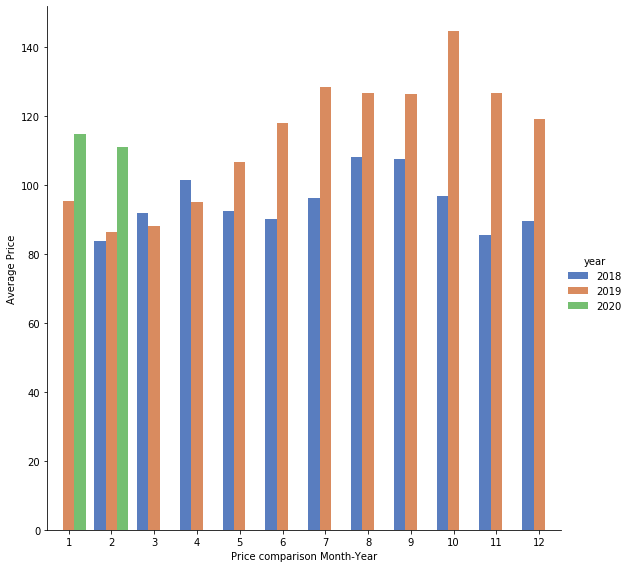

In [17]:
veg_price_month_year = df.groupby(by=['month','year'], as_index=False)[['Vegetable','average']].mean()
veg_price_month_year
fig = plt.figure(figsize = (20,6))

ax = sns.catplot(x="month", y="average", hue="year", data=veg_price_month_year,
                height=8,kind="bar", palette="muted")

ax.set_ylabels("Average Price")
ax.set_xlabels("Price comparison Month-Year")


###### Above Diagram mean vegetable price: 
    for 2018: showed maxium price during April that was during Aug and Sept
    for 2019: showed that peak price for vegetables was during october that is during festive season
    for 2020: we had only 2 months data but the price for Jan and Feb are higher than previous year.
It is quite difficult to predict the priced for upcoming month through this plot

##### Bar diagram showing vegetables group by month

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12')]

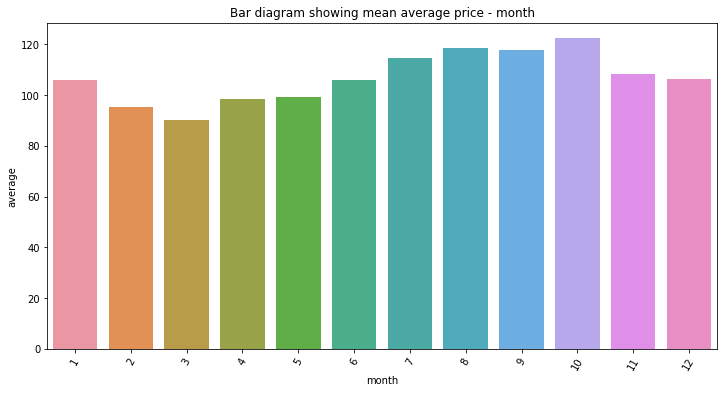

In [19]:
avg_data = veg_grp_month
fig = plt.figure(figsize = (12,6))
ax = sns.barplot(x='month', y='average', data = avg_data)
ax.set_title('Bar diagram showing mean average price - month')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

###### Simple comparison shoed that price might increase during festive season 

In [20]:
translator = Translator()

def convert_name(val):
    result = []
    for v in val:
        b = translator.translate(v).text
        result.append(b)

    return result

In [24]:
veg_grp_name_month_all = df.groupby(by=['Vegetable'], as_index=False)[['low_price','high_price', 'average']].max()

veg_grp_name_month_avg = df.groupby(by=['Vegetable'], as_index=False)[['average']].mean().reset_index()
#splitting data to 3 half
total = len(veg_grp_name_month_all)
ratio = total/3
veg_grp_1 = veg_grp_name_month_avg[:40]

veg_grp_2 = veg_grp_name_month_avg[40:40+40]

veg_grp_3 = veg_grp_name_month_avg[40+40:]

# #translation
veg_grp_1['Vegetable_trans']=convert_name(veg_grp_1['Vegetable'].tolist())

[Text(0, 0, 'Grapes (black)'),
 Text(0, 0, 'Grapes (green)'),
 Text(0, 0, 'ginger'),
 Text(0, 0, 'Pomegranate'),
 Text(0, 0, 'AMBA'),
 Text(0, 0, 'Aampa (dasahari)'),
 Text(0, 0, 'aalu red'),
 Text(0, 0, 'aalu white'),
 Text(0, 0, 'Mango (maladaha)'),
 Text(0, 0, 'Potatoes Red (India)'),
 Text(0, 0, 'Potatoes Red (prop)'),
 Text(0, 0, 'tamarind'),
 Text(0, 0, 'Cowley tarari'),
 Text(0, 0, 'Cowley local'),
 Text(0, 0, 'Kakko (Local)'),
 Text(0, 0, 'Kakko (hybrid)'),
 Text(0, 0, 'lemon'),
 Text(0, 0, 'asparagus'),
 Text(0, 0, 'banana'),
 Text(0, 0, 'koiralo'),
 Text(0, 0, 'Green peppers (Savina)'),
 Text(0, 0, 'Green peppers (bullet)'),
 Text(0, 0, 'Green peppers (mache)'),
 Text(0, 0, 'khursani dried'),
 Text(0, 0, 'khursani green'),
 Text(0, 0, 'Carrots (valley)'),
 Text(0, 0, 'Carrots (Local)'),
 Text(0, 0, 'gante radish'),
 Text(0, 0, 'gunduka'),
 Text(0, 0, 'Large tomatoes (Nepal)'),
 Text(0, 0, 'small tomatoes'),
 Text(0, 0, 'Small tomatoes (tunnel)'),
 Text(0, 0, 'Small tomatoes (

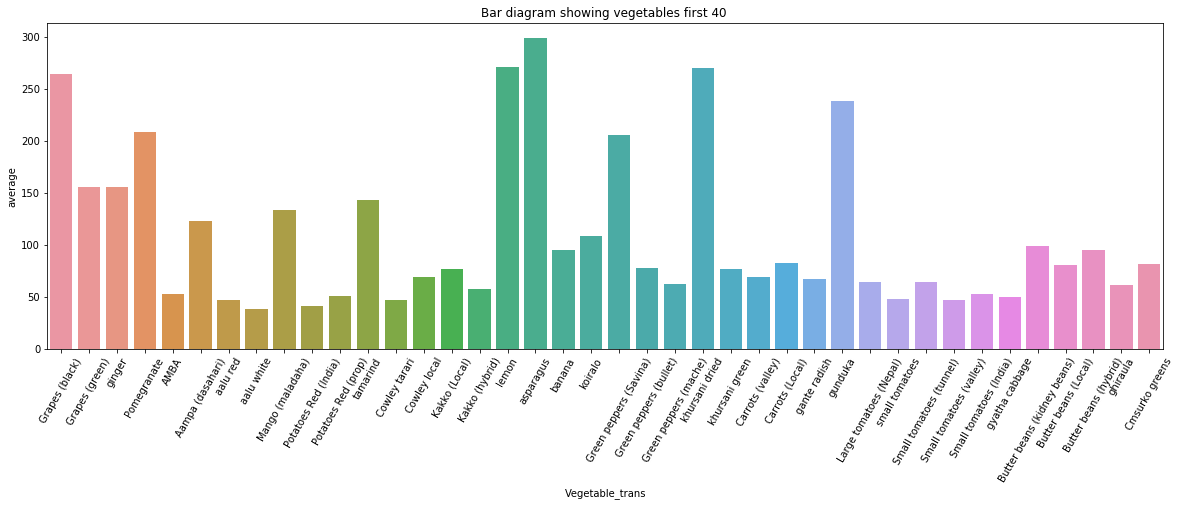

In [29]:
#Bar diagram showing first 40 vegetables avegrage price
avg_data = veg_grp_1.reset_index()
fig = plt.figure(figsize = (20,6))
ax = sns.barplot(x='Vegetable_trans', y='average', data = avg_data)
ax.set_title('Bar diagram showing vegetables first 40 ')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)


###### Considering the first 40 vegetables max pice was for asparagus  atround 300 followed by lemon 275 (in average)

In [25]:
veg_grp_2['Vegetable_trans']=convert_name(veg_grp_2['Vegetable'].tolist())

[Text(0, 0, 'cicindo'),
 Text(0, 0, 'cukundara'),
 Text(0, 0, 'Mushroom (maid)'),
 Text(0, 0, 'Mushroom (Jolly)'),
 Text(0, 0, 'dried cured'),
 Text(0, 0, 'cured green'),
 Text(0, 0, 'lettuce'),
 Text(0, 0, 'jhiguni'),
 Text(0, 0, 'Tate Simi'),
 Text(0, 0, 'Large tomatoes (India)'),
 Text(0, 0, 'Melon (Pate)'),
 Text(0, 0, 'Leeks (green)'),
 Text(0, 0, 'yam'),
 Text(0, 0, 'Fresh fish (rod)'),
 Text(0, 0, 'Fresh fish (bacuva)'),
 Text(0, 0, 'Fresh fish (mamugari)'),
 Text(0, 0, 'Fresh fish (keep calm)'),
 Text(0, 0, 'copper'),
 Text(0, 0, 'bitter gourd'),
 Text(0, 0, 'Tofu'),
 Text(0, 0, 'mustard greens'),
 Text(0, 0, 'Pear (Chinese)'),
 Text(0, 0, 'Pear (Local)'),
 Text(0, 0, 'Neuro'),
 Text(0, 0, 'Parver (valley)'),
 Text(0, 0, 'Prvr (Local)'),
 Text(0, 0, 'Parsley'),
 Text(0, 0, 'Palugo greens'),
 Text(0, 0, 'randia uliginosa'),
 Text(0, 0, 'Peppermint'),
 Text(0, 0, 'Dried onion Indian'),
 Text(0, 0, 'green onions'),
 Text(0, 0, 'ripe Pumpkin'),
 Text(0, 0, 'Pumpkin green (elongated

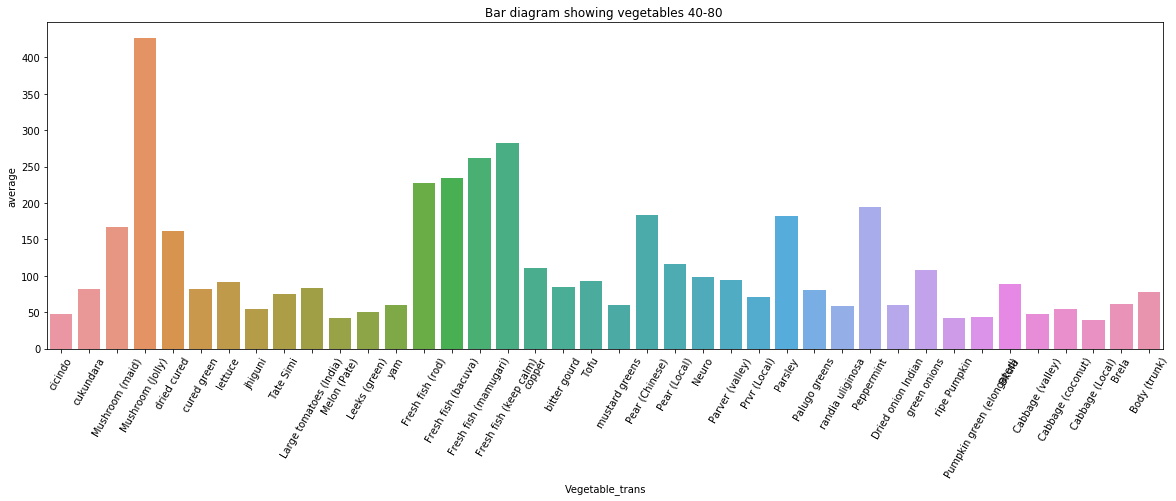

In [30]:
# Bar diagram showing next 40 vegetables average price
avg_data_below = veg_grp_2.reset_index()
fig = plt.figure(figsize = (20,6))

ax=sns.barplot(x='Vegetable_trans', y='average', data = avg_data_below)
ax.set_title('Bar diagram showing vegetables 40-80 ')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)


###### Above bar showd that mushroom had maxium price above 400

In [27]:
veg_grp_3['Vegetable_trans']=convert_name(veg_grp_3['Vegetable'].tolist())

[Text(0, 0, 'broccoli'),
 Text(0, 0, 'bhatamasakosa'),
 Text(0, 0, 'Aubergine ball'),
 Text(0, 0, 'elongated eggplant'),
 Text(0, 0, 'Okra'),
 Text(0, 0, 'bhuri tangerine'),
 Text(0, 0, 'bhede khursani'),
 Text(0, 0, 'maize body'),
 Text(0, 0, 'Mtrkosha'),
 Text(0, 0, 'fresh fish'),
 Text(0, 0, 'red radish'),
 Text(0, 0, 'White radish (Local)'),
 Text(0, 0, 'fenugreek greens'),
 Text(0, 0, 'Nuts (Nepal)'),
 Text(0, 0, 'Nuts (India)'),
 Text(0, 0, 'weather'),
 Text(0, 0, 'red cabbage'),
 Text(0, 0, 'mustard greens'),
 Text(0, 0, 'tangerine tree'),
 Text(0, 0, 'jelly'),
 Text(0, 0, 'Chinese dried garlic'),
 Text(0, 0, 'Dried garlic Nepal'),
 Text(0, 0, 'garlic green'),
 Text(0, 0, 'Lichchi (India)'),
 Text(0, 0, 'Lichchi (Local)'),
 Text(0, 0, 'Lorca'),
 Text(0, 0, 'sakharakhanda'),
 Text(0, 0, 'Sajivan'),
 Text(0, 0, 'Chinese dried onion'),
 Text(0, 0, 'Orange (Nepal)'),
 Text(0, 0, 'Orange (India)'),
 Text(0, 0, 'White radish (hybrid)'),
 Text(0, 0, 'Salary'),
 Text(0, 0, 'Sufko greens

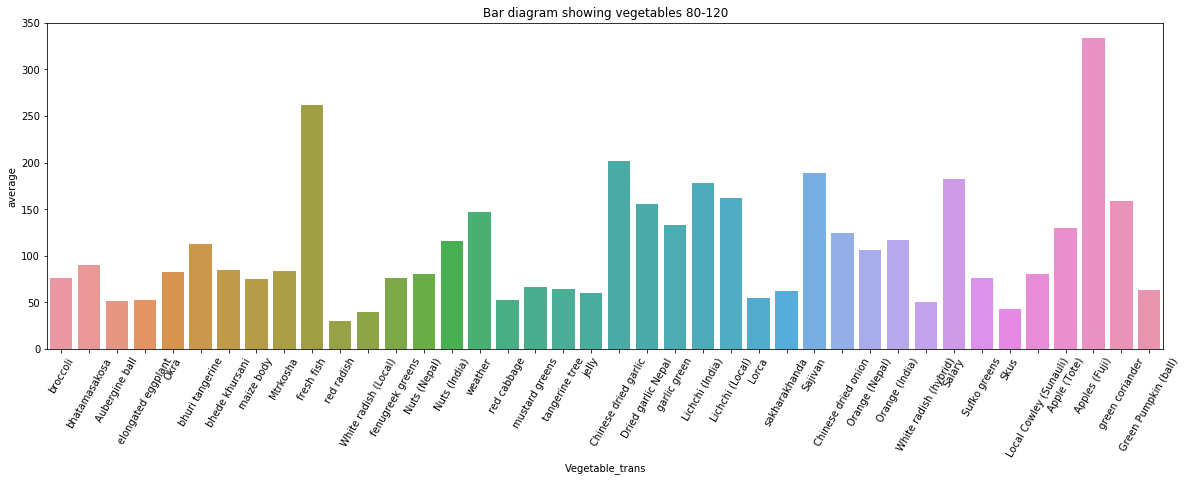

In [31]:
#Bar diagram showing average price for remaining vegetables
avg_data_below = veg_grp_3.reset_index()
fig = plt.figure(figsize = (20,6))

ax=sns.barplot(x='Vegetable_trans', y='average', data = avg_data_below)
ax.set_title('Bar diagram showing vegetables 80-120')
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

###### Above bar showed Apple(Fuji) to have high price around 340
COmparing 3 bar diagrams Mushroom is to be most expensive vegetable and apple which is a fruit 

##### Now Simply analysing single vegetable "Mushroom"

In [32]:
max_price_by_name = df.groupby(by=['Vegetable','month','year'], as_index=False)[['low_price','high_price', 'average']].max()

exp_veg = veg_grp_2[veg_grp_2['Vegetable_trans'] =='Mushroom (maid)']
exp_veg

,index,Vegetable,average,Vegetable_trans
42,42,च्याउ(कन्य),166.849965,Mushroom (maid)


In [33]:
mushroom = max_price_by_name[max_price_by_name['Vegetable'] == 'च्याउ(कन्य)']
mushroom['Vegetable_trans']=convert_name(mushroom['Vegetable'].tolist())
mushroom

,Vegetable,month,year,low_price,high_price,average,Vegetable_trans
648,च्याउ(कन्य),1,2019,180,200,190,Mushroom (maid)
649,च्याउ(कन्य),1,2020,170,180,175,Mushroom (maid)
650,च्याउ(कन्य),2,2018,110,120,115,Mushroom (maid)
651,च्याउ(कन्य),2,2019,170,180,175,Mushroom (maid)
652,च्याउ(कन्य),2,2020,120,130,125,Mushroom (maid)
653,च्याउ(कन्य),3,2018,200,210,205,Mushroom (maid)
654,च्याउ(कन्य),3,2019,150,160,155,Mushroom (maid)
655,च्याउ(कन्य),4,2018,260,280,270,Mushroom (maid)
656,च्याउ(कन्य),4,2019,240,250,245,Mushroom (maid)
657,च्याउ(कन्य),5,2018,240,250,245,Mushroom (maid)


<Figure size 1440x504 with 0 Axes>

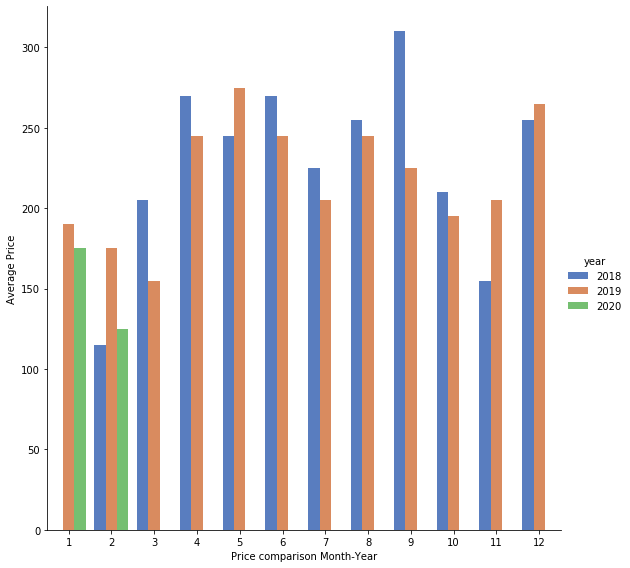

In [34]:
fig = plt.figure(figsize = (20,7))  #figsize
ax = sns.catplot(x="month", y="average", hue="year", data=mushroom,
                height=8,kind="bar", palette="muted")
ax.set_ylabels("Average Price")
ax.set_xlabels("Price comparison Month-Year")

###### From Analysis of mushroom:
    In 2018 Mushroom had maxium price during September above 300, followed by April, May around 260 
        and minimum price was during  Feb around 120
    In 2019, Maxium price was during May around 265, followed by Dec around 260 and munimum price during March 155
    In 2020, Price in Feb was less than that of Jan

##### Apple(Fuji)

In [35]:
apple_fuji = veg_grp_3[veg_grp_3['Vegetable_trans'] =='Apples (Fuji)']
apple_fuji

,index,Vegetable,average,Vegetable_trans
117,117,स्याउ(फूजी),333.477011,Apples (Fuji)


In [36]:
apple = max_price_by_name[max_price_by_name['Vegetable'] == 'स्याउ(फूजी)']
apple['Vegetable_trans']=convert_name(apple['Vegetable'].tolist())
apple

,Vegetable,month,year,low_price,high_price,average,Vegetable_trans
1858,स्याउ(फूजी),5,2019,290,300,295,Apples (Fuji)
1859,स्याउ(फूजी),6,2019,400,450,425,Apples (Fuji)
1860,स्याउ(फूजी),7,2019,360,380,370,Apples (Fuji)
1861,स्याउ(फूजी),8,2019,380,390,385,Apples (Fuji)


<Figure size 720x288 with 0 Axes>

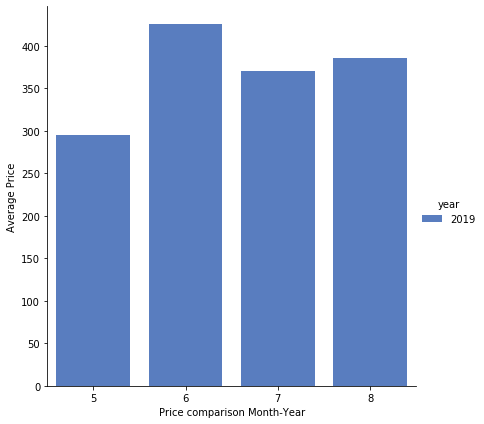

In [37]:
fig = plt.figure(figsize = (10,4))  #figsize
ax = sns.catplot(x="month", y="average", hue="year", data=apple,
                height=6,kind="bar", palette="muted")
ax.set_ylabels("Average Price")
ax.set_xlabels("Price comparison Month-Year")

###### We only have record of 2019 for Apple(Fuji) which showed that it depends on season 
    and is available during May- Aug and in June its price might increase

#### Lemon

In [43]:
#Chk vegetables lemon  
lemon = df[df["Vegetable"] == 'कागती'][['Vegetable','Unit','average', 'month','year','priceType']]
lemon_w = lemon[lemon["priceType"] == 'W'][['Vegetable','average','month', 'year']]
lemon_R = lemon[lemon["priceType"] == 'R'][['Vegetable','average', 'month','year']]

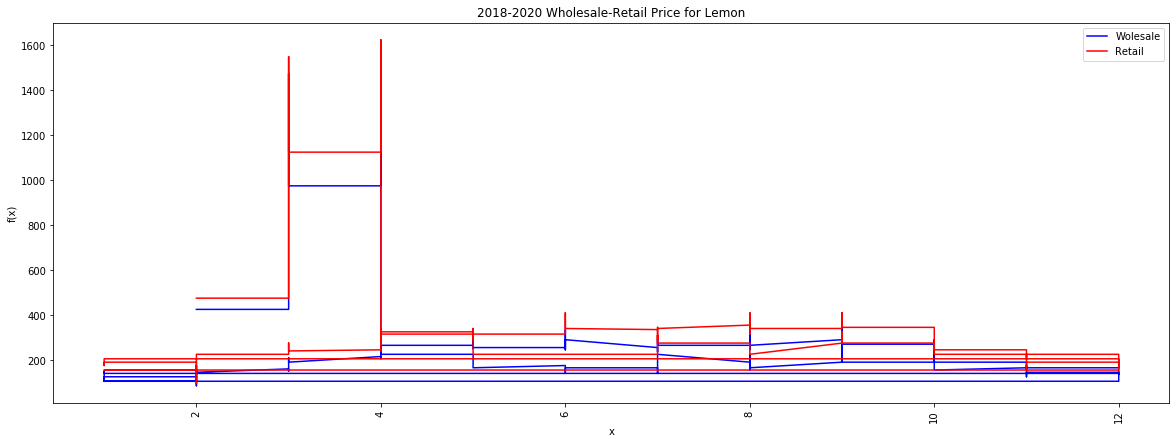

In [44]:
a=lemon_w.groupby('month')
fig = plt.figure(figsize = (20,7))  #figsize
x = lemon_w['month']
x_r = lemon_R['month']

y_w = lemon_w['average']
y_R = lemon_R['average']
plt.plot(x, y_w, color = 'b', label = 'Wolesale' )
plt.plot(x_r, y_R, color = 'r', label = 'Retail' )

plt.legend()  # add legend
plt.xticks(rotation='vertical')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('2018-2020 Wholesale-Retail Price for Lemon')
plt.show()

###### Above Diagram is price of Lemon based on wholesale and retail price 
    which shows that retail price increases by around 60-70% based on wholesale price

###### Lemon price comparison per month based on wholesale and retail price 

<Figure size 1440x504 with 0 Axes>

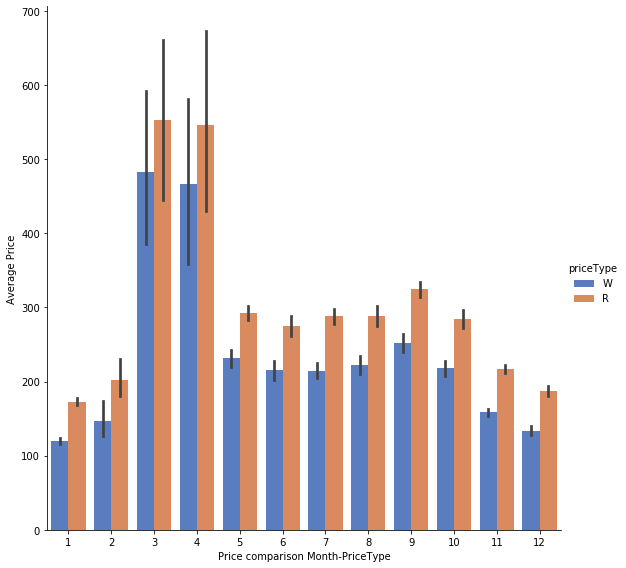

In [45]:
fig = plt.figure(figsize = (20,7))  #figsize
ax = sns.catplot(x="month", y="average", hue="priceType", data=lemon,
                height=8,kind="bar", palette="muted")
ax.set_ylabels("Average Price")
ax.set_xlabels("Price comparison Month-PriceType")

###### Lemon Price Comparison Wholesale per month per year

<Figure size 1440x504 with 0 Axes>

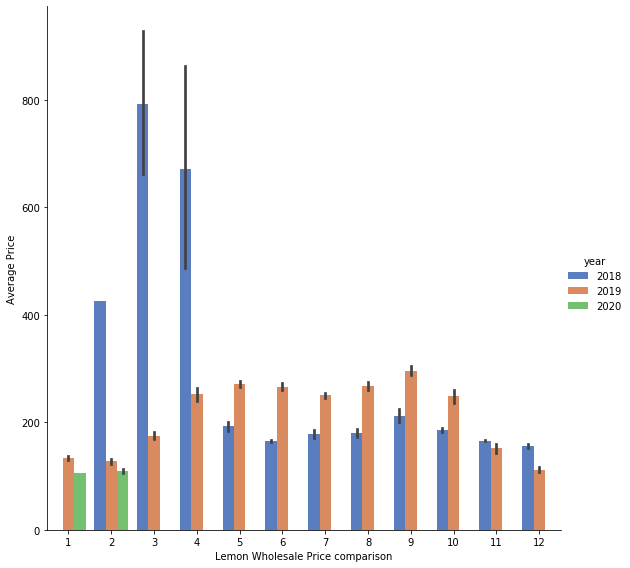

In [46]:
lemon_w

fig = plt.figure(figsize = (20,7))  #figsize
ax = sns.catplot(x="month", y="average", hue="year", data=lemon_w,
                height=8,kind="bar", palette="muted")
ax.set_ylabels("Average Price")
ax.set_xlabels("Lemon Wholesale Price comparison")

###### Lemon Price Comparison Retail per month per year

<Figure size 1440x504 with 0 Axes>

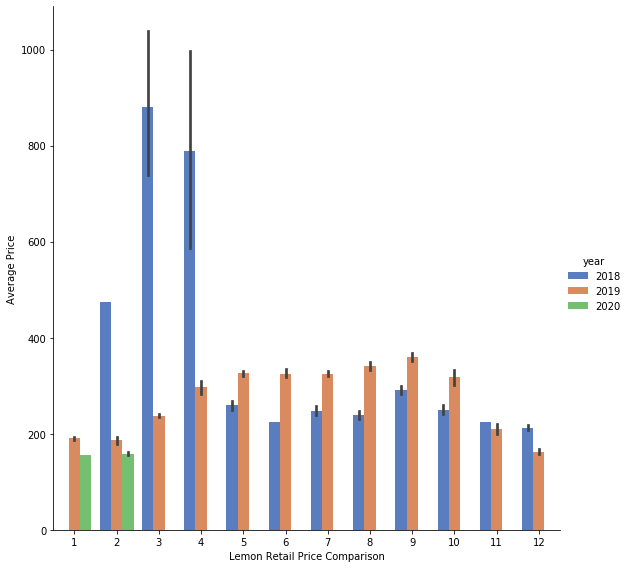

In [48]:
fig = plt.figure(figsize = (20,7))  #figsize
ax = sns.catplot(x="month", y="average", hue="year", data=lemon_R,
                height=8,kind="bar", palette="muted")
ax.set_ylabels("Average Price")
ax.set_xlabels("Lemon Retail Price Comparison")

###### It showed that In both retail and wholesale price showed 2018 mushroom had peak price around 
    800(wholesale) and 900 (retail) price in average whereas 
    in 2019 maximum mean price was around 300(wholesale) and 350(retail price)
    This showed that there must have been some other factor that affected increase in mushroom price

# Plot Seaborn pair plot to check corelation between data

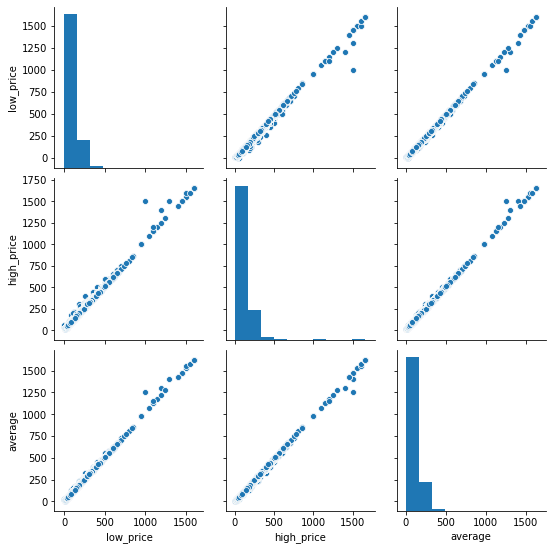

In [8]:
sns.pairplot(df)

# Plot Heatmap - show values of correlation between every field in mathamatics

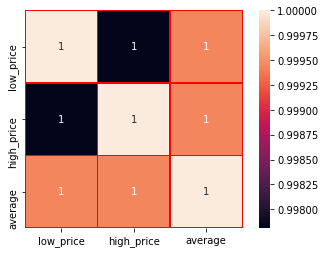

In [9]:
sns.heatmap(df.corr(), linewidth=0.2, vmax=1.0, square= True, linecolor='red', annot=True)

# 2. Feature extraction and feature normalization

In [55]:
feature_df = []

for v in vegetable:
    for p_type in ['W', 'R']:
        #getting last two days as features
        df_v = df[(df['Vegetable'] == v) & (df['priceType'] == p_type)]
        df_v = df_v.sort_values(by=['Date'], ascending = False)

        if p_type == 'W':
            df_v['type'] = 1
        else:
            df_v['type'] = 0
        
        df_v['t_1'] = df_v.shift(-1)['average']                
        df_v['t_2'] = df_v.shift(-2)['average']
        feature_df.append(df_v)
        
feature_df = pd.concat(feature_df)
feature_df.head()

,Vegetable,Unit,low_price,high_price,average,Date,priceType,year,month,type,t_1,t_2
99167,चमसूरको साग,kg,30,35,33,2020-02-15,W,2020,2,1,33.0,33.0
98999,चमसूरको साग,kg,30,35,33,2020-02-14,W,2020,2,1,33.0,33.0
98836,चमसूरको साग,kg,30,35,33,2020-02-13,W,2020,2,1,33.0,33.0
98675,चमसूरको साग,kg,30,35,33,2020-02-12,W,2020,2,1,33.0,33.0
98515,चमसूरको साग,kg,30,35,33,2020-02-11,W,2020,2,1,33.0,33.0


In [56]:
feature_df.tail()

,Vegetable,Unit,low_price,high_price,average,Date,priceType,year,month,type,t_1,t_2
63154,आलु रातो(मुडे),kg,45,50,48,2019-06-27,R,2019,6,0,48.0,48.0
62995,आलु रातो(मुडे),kg,45,50,48,2019-06-26,R,2019,6,0,48.0,48.0
62834,आलु रातो(मुडे),kg,45,50,48,2019-06-25,R,2019,6,0,48.0,48.0
62675,आलु रातो(मुडे),kg,45,50,48,2019-06-24,R,2019,6,0,48.0,NaN
62516,आलु रातो(मुडे),kg,45,50,48,2019-06-23,R,2019,6,0,NaN,NaN


##### Data Cleaning - Deleting rows having null

In [57]:
feature_df.dropna(inplace = True)

feature_df = feature_df.sample(frac=1, random_state = 1)
X = feature_df[['type' , 't_1', 't_2']].values
print(X)

[[   0.  125.  125.]
 [   0.   45.   55.]
 [   0.  125.  135.]
 ...
 [   0.   85.   85.]
 [   0.   75.   75.]
 [   0. 1125. 1125.]]


In [58]:
#Add Bias...Adding 1 to first column

X = np.insert(X, 0, values=1, axis = 1)
print(X)

[[1.000e+00 0.000e+00 1.250e+02 1.250e+02]
 [1.000e+00 0.000e+00 4.500e+01 5.500e+01]
 [1.000e+00 0.000e+00 1.250e+02 1.350e+02]
 ...
 [1.000e+00 0.000e+00 8.500e+01 8.500e+01]
 [1.000e+00 0.000e+00 7.500e+01 7.500e+01]
 [1.000e+00 0.000e+00 1.125e+03 1.125e+03]]


In [59]:
print(X.shape)

(98822, 4)


In [60]:
y = feature_df['average'].values
print(y)
print(y.shape)

[ 105   45  115 ...   85   75 1125]
(98822,)


In [61]:
total = len(X)
train = int(0.6*total)
val = int(0.2*total)
print(total, val)

98822 19764


##### Data splitting

In [62]:
#spliting data into 60% train set 20% validate set and 20% test set
X_train = X[:train]
y_train =y[:train].reshape(-1,1)

#validation 
X_val = X[train:train+val]
y_val = y[train:train+val].reshape(-1,1)

#test 
X_test = X[train+val :]
y_test = y[train+val :].reshape(-1,1)

print(len(X_train), len(X_val), len(X_test))


59293 19764 19765


In [63]:
y_train


array([[105],
       [ 45],
       [115],
       ...,
       [ 75],
       [ 45],
       [ 38]])

##### mean max normalization
#Find min max of training set..Train it 
#Use it in Val and Test set

In [64]:
price_X = X_train[:,2:]

min_v = np.min(price_X)
max_v = np.max(price_X)
diff = max_v-min_v

def min_max_normalization(dataset):
    for i in range(0,dataset.shape[0]):
        for j in range(2,dataset.shape[1]):
            dataset[i][j]=(dataset[i][j]-min_v)/diff

In [65]:
min_max_normalization(X_train)
min_max_normalization(X_val)
min_max_normalization(X_test)

In [66]:
#Numpy array can be directly manipulated
print(X_train.shape[0])
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

59293
(59293, 1)
(19764, 4)
(19764, 1)
(19765, 4)
(19765, 1)


# 3. Grid search parameter with val loss 

In [67]:
np.random.seed(42)

train_error=[]

params ={
    'num_of_iteration': 10000,
    'learning_rate': 0.1
}

grid_param ={
    'num_of_iteration': [1000, 2000, 5000],
    'learning_rate': [0.5, 0.01, 0.1]
}

def MSE(h,y):
    return 0.5*np.average((h-y)**2)

# 4. Model Training and plot Train loss plot  to select he best model [best hyper-parameters and parameters]


In [76]:
def train_model(X_train, y_train, X_Val, y_val,  param):

    W = np.random.rand(X_train.shape[1]).reshape(-1,1)

    train_error = []

    val_error = []
    print("params", param)
    for i in range(1, param['num_of_iteration']):
        h_train = np.matmul(X_train, W)
        
        train_loss = MSE(h_train, y_train)
        if i%10==0:
            train_error.append(train_loss)
        gradient = np.matmul(np.transpose(X_train),(h_train - y_train))/X_train.shape[0]   

        W = W - param['learning_rate'] * gradient
                         
        h_val = np.matmul(X_val, W)
        val_loss = MSE(h_val, y_val)
        val_error.append(val_loss)
#     plt.plot(train_error)
#     plt.xlabel('Iteratopns(per tens)')
#     plt.ylabel('Training Cost')
#     plt.title('Learning Rate')
#     plt.show()
    print(val_loss)
    plt.plot(val_error)
    plt.xlabel('Iteratopns(per tens)')
    plt.ylabel('Validation Cost')
    plt.title('Learning Rate')
    plt.show()
    return W

In [73]:
#Numpy array can be directly manipulated
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
params

(59293, 4)
(59293, 1)
(19764, 4)
(19764, 1)
(19765, 4)
(19765, 1)


{'num_of_iteration': 10000, 'learning_rate': 0.1}

params {'num_of_iteration': 10000, 'learning_rate': 0.1}
88.07534284158258


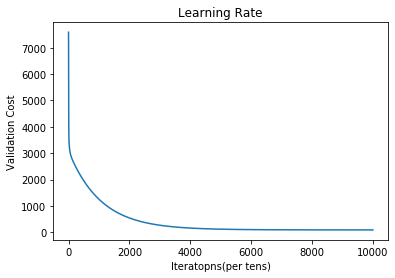

array([[ 1.16247543e+01],
       [-5.61348955e-01],
       [ 8.08958305e+02],
       [ 7.69456457e+02]])

In [77]:
train_model(X_train, y_train, X_val, y_val, params)

params {'num_of_iteration': 1000, 'learning_rate': 0.5}
115.754440067621


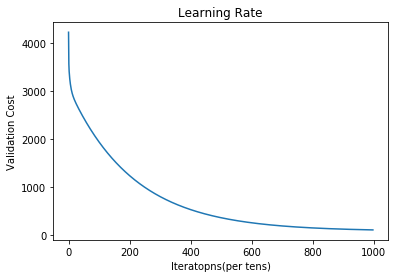

params {'num_of_iteration': 1000, 'learning_rate': 0.01}
2827.5706717240128


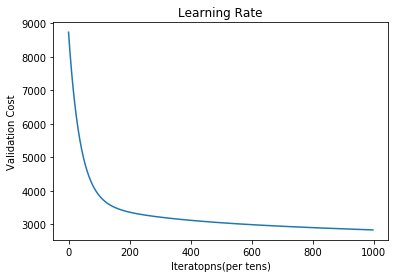

params {'num_of_iteration': 1000, 'learning_rate': 0.1}
1251.6974259519625


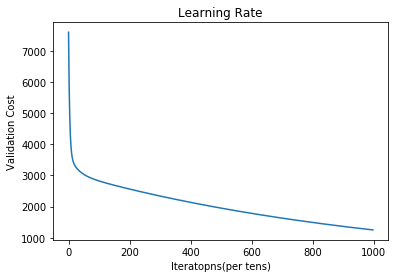

params {'num_of_iteration': 2000, 'learning_rate': 0.5}
88.08282646124177


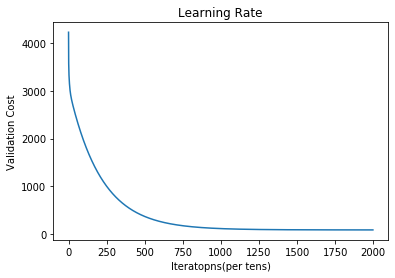

params {'num_of_iteration': 2000, 'learning_rate': 0.01}
2565.9514309797964


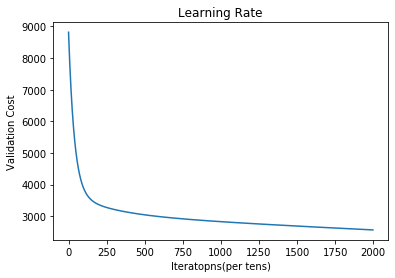

params {'num_of_iteration': 2000, 'learning_rate': 0.1}
541.5128000755625


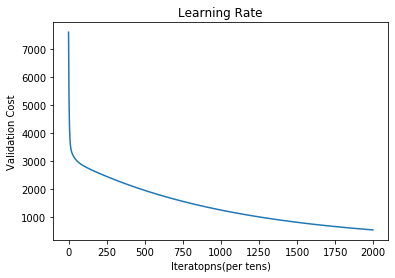

params {'num_of_iteration': 5000, 'learning_rate': 0.5}
86.44871899233291


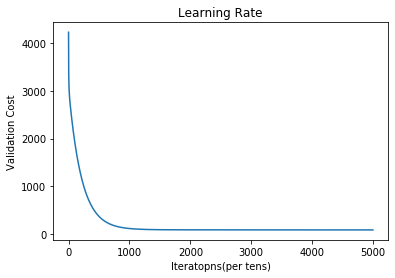

params {'num_of_iteration': 5000, 'learning_rate': 0.01}
1952.29655673453


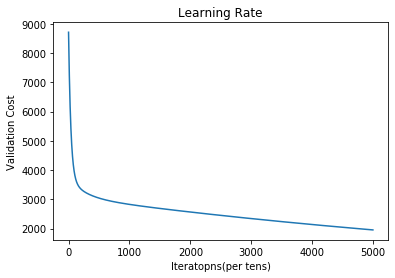

params {'num_of_iteration': 5000, 'learning_rate': 0.1}
115.76725007234438


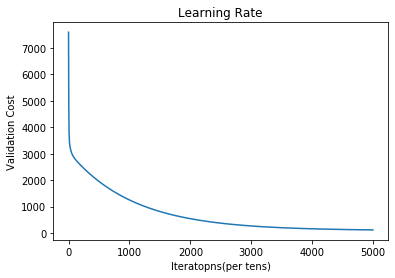

In [78]:
import itertools
grid = list(itertools.product(grid_param['num_of_iteration'], grid_param['learning_rate']))

for g in grid:
    p = {
        'num_of_iteration': g[0],
        'learning_rate' : g[1]
    }

    train_model(X_train, y_train, X_val, y_val, p)

###### Above Val error plot showed that Learning  Rate 0.5 and iteration 5000 had val_loss og 86 so considering this parameter for testing data set

# 5. Model evaluation [R2 score] using the test set. 

In [83]:
X_test, y_test

(array([[1.        , 1.        , 0.01485149, 0.02413366],
        [1.        , 1.        , 0.11200495, 0.11200495],
        [1.        , 1.        , 0.07178218, 0.07178218],
        ...,
        [1.        , 0.        , 0.0470297 , 0.0470297 ],
        [1.        , 0.        , 0.04084158, 0.04084158],
        [1.        , 0.        , 0.69059406, 0.69059406]]),
 array([[  38],
        [ 190],
        [ 125],
        ...,
        [  85],
        [  75],
        [1125]]))

params {'num_of_iteration': 5000, 'learning_rate': 0.5}
86.45270202712216


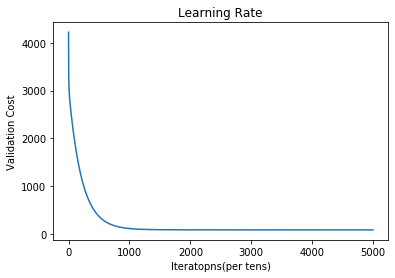

In [84]:
final_param ={
    'num_of_iteration': 5000,
    'learning_rate': 0.5
}
model_weights = train_model(X_train, y_train, X_val, y_val, final_param)


In [85]:
model_weights.shape

(4, 1)

# R2

In [87]:
y_mean = np.mean(X_test)
h_test = np.matmul(X_test, model_weights)
y_pred = h_test
print(h_test, y_mean)
n = X_test.shape[0]
k = X_test.shape[1] - 1
print(n, k)

SSE = np.sum(y_pred-y_mean)**2
print(SSE)
SST = np.sum(y_test-y_mean)**2
print(SST)

R2  = SSE/SST
print("R2: ", R2)

[[  40.96293019]
 [ 188.64038094]
 [ 124.60895036]
 ...
 [  85.57108775]
 [  75.72009843]
 [1110.0739769 ]] 0.4055376462418567
19765 3
4438827117143.599
4439855864372.033
R2:  0.9997682926518652


###### R2 error is: 0.99

###### File link: 
https://github.com/Kristiee/Linear-regression